<a href="https://colab.research.google.com/github/EssenceBL/ATasteOfDeepLearning/blob/main/The_Ming_Catalan_Number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The name that can be named is not the enduring and unchanging name.

-- Tao Te Ching, Laozi

Definitions belong to the definers, not the defined.

-- Toni Morrison

### Background

To name the same thing with a different sometimes indicate a certain transformation, that is a translation with an emphasize on changing perspectives. Through differnce, one strieves to explore the true underlying nature. The Catalan or Ming-Catalan Number is an example of mathematical object that could be defined in various perspectives that lead to the same entity of investigation. Transformation between these perspectives could be ideally explained with some Colab exerciese. This also serve as an expansion on the base of the series of connecting mathematics and programming, that is a continuation.

--YK with DeepSeek, 2025

Like other Colab notebooks, please run the code cells one by one. In particular, the following code cell is concerned with the dependency package and needs to be run first.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
from IPython.display import clear_output
from ipywidgets import interact, IntSlider
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interactive

### Listing Dyck words

In [5]:

def dyck_words(n):
  # Initialize base word: 0101...01 of length 2n
  X = ['U' if i % 2 == 0 else 'R' for i in range(2 * n)]
  wordString = ''.join(X)
  yield wordString  # Visit initial word
  def generate(X, k):
    wordString = ''.join(X)
    i = k
    while i < 2 * n - 1:
      # Find first occurrence of "UR" (was "10") starting from position i
      j = None
      for pos in range(i, 2 * n - 1):
        if X[pos] == 'R' and X[pos + 1] == 'U':
          j = pos
          break
      if j is None:
        break
      # Create copy Y
      Y = X.copy()
      # Swap U and R (change UR to RU)
      Y[j], Y[j + 1] = Y[j + 1], Y[j]
      # Visit new word
      yield ''.join(Y)
      i = j + 2
      # Recursive call with j-1
      yield from generate(Y, j - 1)
  # First call with k=1
  yield from generate(X, 1)

def display_dyck_words(n):
  #start_time = time.time()
  #print("Timer started!")
  count = 0
  words = list(dyck_words(n))
  print(f"n={n}: {len(words)} word(s)")
  for word in words:
    count += 1
    print(f"{count}. {word}")
  print()
  #elapsed_time = time.time() - start_time
  #print(f"Time taken: {elapsed_time:.2f} seconds")
  print("-" * 55)


# Create the interactive widget and capture it in a variable
widget = interact(display_dyck_words,
         n=IntSlider(value=3, min=0, max=9, step=1,
                    description='n:',
                    continuous_update=False))


# This will show only the slider, not the function output
output = widgets.Output()


interactive(children=(IntSlider(value=3, continuous_update=False, description='n:', max=9), Output()), _dom_cl…

### Dyck word as a name for valid path

In [6]:
def draw_grid(ax, rows, cols, title, diagonal_start, diagonal_end):
    # Draw horizontal lines
    for i in range(rows+1):
        ax.plot([0, cols],
            [i , i],
            '-', color='grey', alpha=0.7)

    # Draw vertical lines
    for j in range(cols+1):
        ax.plot([j, j],
            [0, rows],
            '-', color='grey', alpha=0.7)

    # Draw diagonal line (extend a bit beyond the grid)
    ax.plot([diagonal_start[0]-0.2, diagonal_end[0]+0.2],
            [diagonal_start[1]-0.2, diagonal_end[1]+0.2],
            '--', color='blue', alpha=0.7)

    ax.set_xlim(-0.5, cols + 0.5)
    ax.set_ylim(-0.5, rows + 0.5)
    ax.set_title(title)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.grid(False)

def draw_path(ax, path, start_pos=(0, 0), color = 'blue'):
    x, y = start_pos
    positions = [(x, y)]

    # Draw each step of the path
    for move in path:
        if move == 'U':
            # Draw upward arrow
            ax.arrow(x, y, 0, 1, head_width=0.1, head_length=0.1,
                    fc=color, ec=color, linewidth=2)
            y += 1
        else:
            # Draw rightward arrow
            ax.arrow(x, y, 1, 0, head_width=0.1, head_length=0.1,
                    fc=color, ec=color, linewidth=2)
            x += 1
        positions.append((x, y))

    return positions


def draw_valid(n, path_str):
  fig, ax = plt.subplots(figsize=(3, 3))
  path = list(path_str)
  pathStr = ''.join(path)
  draw_grid(ax, n, n, f'{pathStr}', (1, 0), (n, n-1))
  draw_path(ax, path)
  plt.tight_layout()
  plt.show()
  return

def dyck_words(n):
  # Initialize base word: 0101...01 of length 2n
  X = ['U' if i % 2 == 0 else 'R' for i in range(2 * n)]
  wordString = ''.join(X)
  yield wordString  # Visit initial word
  def generate(X, k):
    wordString = ''.join(X)
    draw_valid(n, X)
    i = k
    while i < 2 * n - 1:
      # Find first occurrence of "UR" (was "10") starting from position i
      j = None
      for pos in range(i, 2 * n - 1):
        if X[pos] == 'R' and X[pos + 1] == 'U':
          j = pos
          break
      if j is None:
        break
      # Create copy Y
      Y = X.copy()
      # Swap U and R (change UR to RU)
      Y[j], Y[j + 1] = Y[j + 1], Y[j]
      # Visit new word
      yield ''.join(Y)
      i = j + 2
      # Recursive call with j-1
      yield from generate(Y, j - 1)
  # First call with k=1
  yield from generate(X, 1)

# Create the interactive widget and capture it in a variable
widget = interact(display_dyck_words,
         n=IntSlider(value=3, min=0, max=5, step=1,
                    description='n:',
                    continuous_update=False))


# This will show only the slider, not the function output
output = widgets.Output()


interactive(children=(IntSlider(value=3, continuous_update=False, description='n:', max=5), Output()), _dom_cl…

### From path to assoication

In [7]:
def PathToAssociation(pathStr):
  n = len(pathStr)//2 + 1
  pathStr_read = ''
  pathStr_unread = pathStr
  variableUsed = ''
  variablesRemain = 'abcdefghijklmnopqrstuvwxyz'
  current = '_'
  for i, char in enumerate(pathStr):
    pathStr_read += char
    pathStr_unread = pathStr_unread.replace(char, '', 1)
    if char == "U":
      current = current.replace('_', '(_)')
      print("U: ", current)
    elif char == "R":
      pos = current.find('_')
      current = current.replace('_', variablesRemain[0]+'_')
      pos += 1
      variableUsed += variablesRemain[0]

      for k in range(2,len(variableUsed)+1):
        #print('pos', pos)
        #print('k', k)
        if k == 2:
          check = pos-2
          #print('check',check)
          if current[check] == '(':
            #print('not moving', current)
            break
          elif current[check] in ')abcdefghijklmnopqrstuvwxyz':
            current = current[:pos] + ')_' + current[pos+2:]
            pos += 1
            #print('moving', current)
        else:
          checkS = list(range(pos - 3 - 2, -1, -3))
          #print('checkS', checkS)
          indices = [i for i, char in enumerate(current) if char == '(' and i in checkS]
          #print('indices',indices)
          balancing = [current[index+1:pos].count('(') - current[index+1:pos].count(')') for index in indices]
          #print('balancing',balancing)
          if 0 in balancing:
            #print('not moving', current)
            break
          else:
            current = current[:pos] + ')_' + current[pos+2:]
            pos += 1
            #print('moving', current)
      print("R: ", current)
      variablesRemain = variablesRemain[1:]
  current = current.replace('_', variablesRemain[0])
  variablesRemain = variablesRemain[1:]
  print("Path to association: ", pathStr, "->", current, '\n')
  return current

def list_association(n):
  # Initialize base word: 0101...01 of length 2n
  X = ['U' if i % 2 == 0 else 'R' for i in range(2 * n)]
  wordString = ''.join(X)
  yield wordString  # Visit initial word
  def generate(X, k):
    wordString = ''.join(X)
    PathToAssociation(wordString)
    i = k
    while i < 2 * n - 1:
      # Find first occurrence of "UR" (was "10") starting from position i
      j = None
      for pos in range(i, 2 * n - 1):
        if X[pos] == 'R' and X[pos + 1] == 'U':
          j = pos
          break
      if j is None:
        break
      # Create copy Y
      Y = X.copy()
      # Swap U and R (change UR to RU)
      Y[j], Y[j + 1] = Y[j + 1], Y[j]
      # Visit new word
      yield ''.join(Y)
      i = j + 2
      # Recursive call with j-1
      yield from generate(Y, j - 1)
  # First call with k=1
  yield from generate(X, 1)

def display_associations(n):
  #start_time = time.time()
  #print("Timer started!")
  count = 0
  paths_to_associations = list(list_association(n))
  #elapsed_time = time.time() - start_time
  #print(f"Time taken: {elapsed_time:.2f} seconds")
  print("-" * 55)


# Create the interactive widget and capture it in a variable
widget = interact(display_associations,
         n=IntSlider(value=3, min=0, max=9, step=1,
                    description='n:',
                    continuous_update=False))


# This will show only the slider, not the function output
output = widgets.Output()


interactive(children=(IntSlider(value=3, continuous_update=False, description='n:', max=9), Output()), _dom_cl…

### From assoication to path


Try with your assoication with alphabet a, b, c, d, e..., 
 using ( and ) to indicate each and every composition, 
 for example (a(b(c(((de)(f((gh)i)))j)))): 
(a(b(c(((de)(f((gh)i)))j))))
Association:  (a(b(c(((de)(f((gh)i)))j))))
Corresponding valid path:  URURURUUURRURUURRR


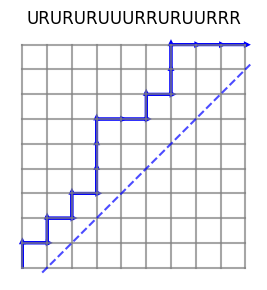

In [ ]:
def AssociationToPath(parathesis):
  variables = 'abcdefghijklmnopqrstuvwxyz'
  countU = 0
  countR = 0
  countClose = 0
  path = ''
  for i, char in enumerate(parathesis):
    if char == '(':
      path = path + 'U'
      countU += 1
    elif char == variables[0]:
      countR += 1
      if countR > countU:
        countR = countU
        break
      path = path + 'R'
      variables = variables.replace(char, '')
    elif char == ')':
      countClose += 1
    else:
      print("Your input is not valid, please do it again")
      break
  if countU == countR:
    return path
  else:
    return

# @title Try with your own assoication, only valid ones would run through
while True:
  # Print the input first
  testassociation = input("Try with your assoication with alphabet a, b, c, d, e..., \n using ( and ) to indicate each and every composition, \n for example (a(b(c(((de)(f((gh)i)))j)))): \n")
  # Try to convert with error handling
  try:
    path = AssociationToPath(testassociation)
    if path:
      print('Association: ', testassociation)
      print('Corresponding valid path: ', path)
      draw_valid(len(path)//2, path)
      break  # Exit the loop when we get a valid output
  except:
    print("Please check your input; something is not working.")
#URURURUUURRRUURRUR -> (a(b(c(((de)f)((gh)(ij))))))

### Counting the Ming-Catalan number

This final twist gives us the exact lens to distinguish between the desired ones and the "hypos". We are ready to consolidate the counting Ming-Catalan number.

![picture](https://drive.google.com/uc?id=1X_cz60yLw1ImXZJDARfSNIo_x75YeZ3v)

### Some history of my own on this topic besides the above interactive pedagogy

- Coincides with one toolkit I made to benchmark time on constructing one STEM case study.

- Coincides with a series of workshop connecting mathematics and programming.